<div style='width:100%;height:2em;font-size:100%;'>    <div style='height:2em; float:left; margin:auto; margin-left:1em;'>Search-Based Software Engineering</div>    <img src='uni-leipzig.png' style='height:2em;float:left; margin:auto; margin-left:1em;'>   <img src='SOSY-Logo.png' style='height:2em;float:right; margin:auto; margin-left:1em;'>   <div style='height:2em; float:right; margin:auto; margin-left:1em;'> Johannes Dorn</div></div>

# Search-Based Software Engineering Exercise
## Exercise 01 - Traveling Salesman Problem Introduction
<center>
    
    Johannes Dorn (johannes.dorn@informatik.uni-leipzig.de)
    
    Softwaresysteme - Summer Term 2023
    
</center>
<center>
    <img src='uni-leipzig.png' style="height:5em" >   <img src='SOSY-Logo.png' style="height:5em">
    
</center>

The Traveling Salesman Problem (TSP) is given by the following question:

*“Given is a list of cities and distances between each pair of cities - what is the shortest route that visits each city and returns to the original city?”*


<center>
    <img src='TSP_Deutschland_3.png' style="height:15em; margin-top:2em;" > 
</center>


The TSP is an **NP-Hard-Problem** which does not mean an instance of the  problem will be hard to solve.

It means, there does not exist an algorithm that produces the best solution in polynomial time.

We can not make predictions about how long it might take to find the best solution.

However, we can find a good solution which might not be the best solution.

It is ok to find a route amongst 1000 cities that is only few miles longer than the best route.

Particularly, if it would take an inordinate amount amount of computing time to get from our good solution to the best solution.

The Traveling Salesman Problem (TSP) is given by the following question: *“Given is a list of cities and distances between each pair of cities - what is the shortest route that visits each city and returns to the original city?”*

The TSP is an **NP-Hard-Problem** which does not mean an instance of the  problem will be hard to solve. It means, there does not exist an algorithm that produces the best solution in polynomial time. We can not make predictions about how long it might take to find the best solution.

But, we can find a good solution which might not be the best solution. It is ok to find a route amongst 1000 cities that is only few miles longer than the best route. Particularly, if it would take an inordinate amount amount of computing time to get from our good solution to the best solution.

## Representation of the Problem

<center>
<img src="./Graph_TSP.png" style="height:7em" align="center">
</center>


A TSP can be modelled as an undirected weighted graph:
* cities = vertices
* paths between cities = edges
* distance of a path = weight of an edge

This graph can be represented as an **adjacency matrix**:


|  \     | A     | B     | C     | D     |
| :---:  | :---: | :---: | :---: | :---: |
| **A**  |  0    | 20    | 42    | 35    |
| **B**  | 20    | 0     | 30    | 34    |
| **C**  | 42    | 30    | 0     | 12    |
| **D**  | 35    | 34    | 12    | 0     |

But how do we get the distances between cities if we only got the coordinates for each city?

### Euclidean Distance

Each city is represented by a cartesian koordinate P

$ P = (p_x, p_y) $

Euclidean distance between two points P<sub>1</sub> = (x<sub>1</sub>, y<sub>1</sub>) and P<sub>2</sub> = (x<sub>2</sub>, y<sub>2</sub>) is:

$d(P_{1},P_{2}) = \sqrt{(x_{1} - x_{2})^2 + (y_{1} - y_{2})^2}$

In [1]:
from itertools import permutations

In [2]:
def distance(p1, p2):
    """
    Returns the Euclidean distance of two points in the Cartesian Plane.

    >>> distance([3,4],[0,0])
    5.0
    
    """
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2) ** 0.5

In [3]:
distance([20,5],[7,6])

13.038404810405298

In [4]:
def total_distance(points):
    """
    Returns the length of the path passing throught
    all the points in the given order.

    >>> total_distance([[1,2],[4,6]])
    5.0
    >>> total_distance([[3,6],[7,6],[12,6]])
    9.0
    """
    return sum([distance(point, points[index + 1]) for index, point in enumerate(points[:-1])])

- keep in mind that \[:-1\] means "all elements if the list without the last"
- *enumerate* is a function to enumerate all elements of a given sequence

In [5]:
# enumerate example
seasons = ['spring', 'summer', 'fall', 'winter']
enumerate(seasons)

Generators: can be lazily evaluated once

In [6]:
all_seasons_with_numbers = enumerate(seasons)
print(list(all_seasons_with_numbers))

[(0, 'spring'), (1, 'summer'), (2, 'fall'), (3, 'winter')]


In [7]:
print(list(all_seasons_with_numbers))

[]


In [8]:
def traveling_salesman(points, start = None):
    """
    Finds the shortest route to visit all the cities by bruteforce.
    Time complexity is O(N!), so never use on long lists.

    >>> traveling_salesman([[0,0],[10,0],[6,0]])
    ([0, 0], [6, 0], [10, 0])
    >>> traveling_salesman([[0,0],[6,0],[2,3],[3,7],[0.5,9],[3,5],[9,1]])
    ([0, 0], [6, 0], [9, 1], [2, 3], [3, 5], [3, 7], [0.5, 9])
    """
    if start is None:
        start = points[0]
    return min([perm for perm in permutations(points) if perm[0] == start], key = total_distance)

**keep in mind that the permutation without repetition creates $ \frac{n!}{(n-r)!} $ examples**

where n is the amount of elements in the set and r is the number of elements we choose from the set

That means if we have a list of 4 elements we have 24 possible combinations:

$ |perm([a,b,c,d])| = \frac{4!}{(4-4)!} = \frac{4!}{0!} = \frac{4!}{1} = 24 $

In [9]:
# Example for permutations
test_list = ["a", "b", "c", "d"]
test_permutations = permutations(test_list)
for test_perm in test_permutations:
    print(test_perm)

('a', 'b', 'c', 'd')
('a', 'b', 'd', 'c')
('a', 'c', 'b', 'd')
('a', 'c', 'd', 'b')
('a', 'd', 'b', 'c')
('a', 'd', 'c', 'b')
('b', 'a', 'c', 'd')
('b', 'a', 'd', 'c')
('b', 'c', 'a', 'd')
('b', 'c', 'd', 'a')
('b', 'd', 'a', 'c')
('b', 'd', 'c', 'a')
('c', 'a', 'b', 'd')
('c', 'a', 'd', 'b')
('c', 'b', 'a', 'd')
('c', 'b', 'd', 'a')
('c', 'd', 'a', 'b')
('c', 'd', 'b', 'a')
('d', 'a', 'b', 'c')
('d', 'a', 'c', 'b')
('d', 'b', 'a', 'c')
('d', 'b', 'c', 'a')
('d', 'c', 'a', 'b')
('d', 'c', 'b', 'a')


- *permutations* returns tuples with all possible orderings without repeat
- function returns minimum of all possible tuples by the help of the function *total_distance* from above

# How bad could it possibly be?

In [10]:
many_points = [
    [0, 0],
    [1, 5.7],
    [2, 3],
    [3, 7],
    [0.5, 9],
    [3, 5],
    [9, 1],
    [10, 5],
    [20, 5],
    [12, 12],
    [20, 19],
    [25, 6],
    [23, 7]
] 
len(many_points)

13

In [11]:
import datetime  
points = many_points[:9] # try out more than 9 points
start = datetime.datetime.now()
result = traveling_salesman(points)
distance_result = total_distance(result)
now = datetime.datetime.now()
print("calculation time", now - start)
print(f"""
The minimum distance to visit all 
of the following points:
{points,}

starting at
{points[0]} is {distance_result} and takes this route:
{result}""")

calculation time 0:00:00.281527

The minimum distance to visit all 
of the following points:
([[0, 0], [1, 5.7], [2, 3], [3, 7], [0.5, 9], [3, 5], [9, 1], [10, 5], [20, 5]],)

starting at
[0, 0] is 36.358221434159375 and takes this route:
([0, 0], [2, 3], [1, 5.7], [0.5, 9], [3, 7], [3, 5], [9, 1], [10, 5], [20, 5])


## Solving TSP with Hill Climbing

#### Recap: Hill Climbing

Idea:
- use only your local solution and evaluate your 
neighbors to find a better one
- repeat this step until no better neighbour exists

<center>
    <img src='HC.jpg' style="width:30%;" > 
</center>

Pros:
- requires few resources (current state and neighbors)
- finds local optimum (global is possible)
- useful if the search space is huge (even unlimited)

Cons:
- is prone to get stuck at the top of local maximum and on plateaus
- strongly depends on “good” initialization

# Essential Steps for each Meta-Heuristic

- **Initialization procedure**: Provide one or more initial candidate
solutions

- **Assessment procedure**: Assess the quality of a candidate
solution

- Make a **copy** of a candidate solution

- **Modification procedure**: Tweak a candidate solution to
produce a randomly slightly different candidate solution

### Initialization procedure

In [12]:
import random
def init_random_tour(tour_length):
    tour = list(range(tour_length))
    random.shuffle(tour)
    return tour

In [13]:
init_random_tour(4)

[0, 3, 1, 2]

## Copy procedure

In [14]:
from copy import deepcopy # Copy procedure

## Assessment procedure

#### Adjacency Matrix

We will use standard Python lists to represent a route through our collection of cities. Each city will simply be assigned to a number from 0 to N-1 where N is the number of cities. Therefore, our list of cities will be a list of unique numbers between 0 and N-1

We also need to specify a "distance matrix" that we can use to keep track of distances between cities. To generate a distance matrix for a set of (x,y) coordinates we will use the following function:

In [15]:
def cartesian_matrix(coordinates):
    '''
    Creates a distance matrix for the city coords using straight line distances
    computed by the Euclidean distance of two points in the Cartesian Plane.
    '''
    matrix = {}
    for i, p1 in enumerate(coordinates):
        for j, p2 in enumerate(coordinates):
            matrix[i,j] = distance(p1,p2)
    return matrix

This function takes a list of (x,y) tuples and outputs a dictionary that contains the distance between any pair of cities:

In [16]:
m = cartesian_matrix([(0,0), (1,0), (1,1)])
for k, v in m.items():
    print(k, v)

(0, 0) 0.0
(0, 1) 1.0
(0, 2) 1.4142135623730951
(1, 0) 1.0
(1, 1) 0.0
(1, 2) 1.0
(2, 0) 1.4142135623730951
(2, 1) 1.0
(2, 2) 0.0


In [17]:
m[0,2]

1.4142135623730951

\[2,0\] gives the distance between the city with number 2 and the city with  number 0.
In our case the result of \[2,0\] is the same for \[0,2\], but for other TSPs this may not be the case (for example if a street between two cities is only one way - we have to take another route)

#### Read City Coordinates from File

In [18]:
def read_coords(file_handle):
    coords = []
    for line in file_handle:
        x,y = line.strip().split(',')
        coords.append((float(x), float(y)))
    return coords

with open('Aufgabe_1/city100.txt', 'r') as coord_file:
    coords = read_coords(coord_file)
matrix = cartesian_matrix(coords)

On real world problems it may be more complicated to generate a distance matrix - you might need to take a map and calculate the real distances between cities.

#### Compute the Total Distance

In [19]:
def tour_length(matrix, tour):
    """Sum up the total length of the tour based on the distance matrix"""
    result = 0
    num_cities = len(list(tour))
    for i in range(num_cities):
        j = (i+1) % num_cities
        city_i = tour[i]
        city_j = tour[j]
        result += matrix[city_i, city_j]
    return result

In [20]:
import numpy as np
rnd_route = init_random_tour(100)
tour_length(matrix, rnd_route)

27811.450160441407

#### Modification procedure

We will implement the two tweak operators as generator functions that will return all possible versions of a route that can be made in one step of the generator (in a random order).

Generators are iterators which can be only iterated once.
They generate values on the fly and do not store them in memory.
By using a generator function, we can get each possiblility and perhaps decide to not generate any more variations.
This saves the overhead of generating all combinations at once.

In [21]:
def all_pairs(size, shuffle = random.shuffle):
    r1 = list(range(size))
    r2 = list(range(size))
    if shuffle:
        shuffle(r1)
        shuffle(r2)
    for i in r1:
        for j in r2:
            yield(i,j) # yield is an iterator function
            # for each call of the generator it returns the next value in yield

In [22]:
import random

def all_pairs(size, shuffle = random.shuffle):
    r1 = list(range(size))
    r2 = list(range(size))
    if shuffle:
        shuffle(r1)
        shuffle(r2)
    for i in r1:
        for j in r2:
            yield(i,j) # yield is an iterator function
            # for each call of the generator it returns the next value in yield

In [23]:
range(5)

range(0, 5)

In [24]:
all_pairs(3)

<generator object all_pairs at 0x000002B373F68F40>

In [25]:
list(all_pairs(3))

[(0, 1), (0, 0), (0, 2), (1, 1), (1, 0), (1, 2), (2, 1), (2, 0), (2, 2)]

In [26]:
# Tweak 1
def swapped_cities(tour):
    """
    Generator to create all possible variations where two 
    cities have been swapped
    """
    ap = all_pairs(len(tour))
    for i,j in ap:
        if i < j:
            copy = deepcopy(tour)
            copy[i], copy[j] = tour[j], tour[i]
            yield copy

In [27]:
print("start tour swap:",[1,2,3,4])
for tour in swapped_cities([1,2,3,4]):
    print(tour)

start tour swap: [1, 2, 3, 4]
[1, 2, 4, 3]
[1, 4, 3, 2]
[1, 3, 2, 4]
[2, 1, 3, 4]
[4, 2, 3, 1]
[3, 2, 1, 4]


In [28]:
# Tweak 2
def reversed_sections(tour):
    """
    Generator to return all possible variations where the
    section between two cities are swapped.
    It preserves entire sections of a route,
    yet still affects the ordering of multiple cities in one go.
    """
    ap = all_pairs(len(tour))
    for i,j in ap:
        if i != j:
            #print("indices from:",i, "to", j)
            copy = deepcopy(tour)
            if i < j:
                copy[i:j+1] = reversed(tour[i:j+1])
            else:
                copy[i+1:] = reversed(tour[:j])
                copy[:j] = reversed(tour[i+1:])
            if copy != tour: # not returning same tour
                yield copy

In [29]:
print("start tour reverse section:",[1,2,3,4])
for tour in reversed_sections([1,2,3,4]):
    print(tour)

start tour reverse section: [1, 2, 3, 4]
[2, 1, 3, 4]
[3, 2, 1, 4]
[4, 3, 2, 1]
[4, 3, 1, 2]
[1, 3, 2, 4]
[1, 4, 3, 2]
[4, 1, 2, 3]
[4, 2, 3, 1]
[1, 2, 4, 3]
[2, 3, 4, 1]
[3, 4, 2, 1]


### Getting Started with Hill Climbing

To start with Hill Climbing, we need two functions:
- init function that returns a random solution
- objective function that tells us how "good" a solution is

For the TSP, an init function will just return a tour of correct length that has cities aranged in random order.

The objective function will return the length of a tour.

We need to ensure that init function takes no arguments and returns a tour of the correct length and the objective function takes one argument (the solution tour) and returns its length.

Assume we have the city coordinates in a variable *coords* and our distance matrix in *matrix*, we can define the objective function and init function by using *init_random_tour*:

In [30]:
init_function = lambda: init_random_tour(len(coords))
objective_function = lambda tour: tour_length(matrix, tour)

#### Short Explanation of Lambda Functions
is the creation of an anonymous function
- lambda definition does not include a return statement
- it always contains an expression which is returned
- you can put a lambda definition anywhere a function is expected
- you don't have to assign it to a variable

In [31]:
# normal function definition
def f(x): return x**2

# lambda function definition
g = lambda x: x**2
print(f(5))
print(g(5))

25
25


## Basic Hill Climbing

In [32]:
def hc(init_function, move_operator, objective_function, max_evaluations, history=None):
    '''
    Hillclimb until either max_evaluations is 
    reached or we are at a local optimum.
    '''
    best = init_function()
    best_score = objective_function(best)
    
    num_evaluations = 1
    
    while num_evaluations < max_evaluations:
        # move around the current position
        move_made = False
        for candidate in move_operator(best):
            if num_evaluations >= max_evaluations:
                break
            
            candidate_score = objective_function(candidate)
            num_evaluations += 1
            if candidate_score < best_score:
                best = candidate
                best_score = candidate_score
                move_made = True
                break # depth first search
            if history:
                history.log(best, candidate)
        if not move_made:
            break # couldn't find better move - must be a local max
    return (num_evaluations, best_score, best)

### Basic plotting
do not change unless you want to

In [33]:
from IPython.display import HTML, display, clear_output, update_display
from PIL import Image, ImageDraw, ImageFont
import random
import time

In [34]:
class History:
    def __init__(self, plot_slowdown=0.0001):
        self.tours = []
        self.last_plot = time.time()
        self.plot_slowdown = plot_slowdown
        
    def first_log(self):
        return len(self.tours) == 0
        
    def log(self, best, candidate):
        if not self.tours or time.time() - self.last_plot > 1:
            filename = "test"+str(max_evaluations)+".PNG"
            tours={"black":candidate, "red": best}
            self.write_tours_to_img(coords, tours, filename, open(filename, "ab"))
            self.tours.append(best)
            self.last_plot = time.time()
        elif self.plot_slowdown:
            time.sleep(self.plot_slowdown)

    def write_tours_to_img(self, coords, tours, title, img_file):
        coords = deepcopy(coords)
        padding = 20
        # shift all coords a bit inwards
        coords = [(x+padding,y+padding) for (x,y) in coords]
        maxx, maxy = 0,0
        for x,y in coords:
            maxx = max(x,maxx)
            maxy = max(y,maxy)
        maxx += padding
        maxy += padding
        img = Image.new("RGB",(int(maxx), int(maxy)), color=(255,255,255))

        font=ImageFont.load_default()
        d=ImageDraw.Draw(img);
        for color, tour in tours.items():
            num_cities = len(tour)
            for i in range(num_cities):
                j = (i+1) % num_cities
                city_i = tour[i]
                city_j = tour[j]
                x1,y1 = coords[city_i]
                x2,y2 = coords[city_j]
                d.line((int(x1), int(y1), int(x2), int(y2)), fill=color)
                #d.text((int(x1)+7, int(y1)-5), str(i), font=font, fill=(32,32,32))

        for x,y in coords:
            x,y = int(x), int(y)
            d.ellipse((x-5, y-5, x+5, y+5), outline=(0,0,0), fill=(196,196,196))

        del d
        display_id = title
        if self.first_log():
            display(img, display_id=display_id)
        else:
            update_display(img, display_id=display_id, clear=False)
        if self.plot_slowdown:
            time.sleep(self.plot_slowdown)        

In [35]:
def do_hc_evaluations(evaluations , move_operator = swapped_cities, plot_slowdown=0):
    max_evaluations = evaluations
    then = datetime.datetime.now()
    history = History(plot_slowdown=plot_slowdown)
    num_evaluations, best_score, best = hc(init_function, move_operator, objective_function, max_evaluations, history=history)
    now = datetime.datetime.now()
    print("computation time ", now - then)
    print("best score:", best_score)
    print("best route:", best)

## Time to test it all out!

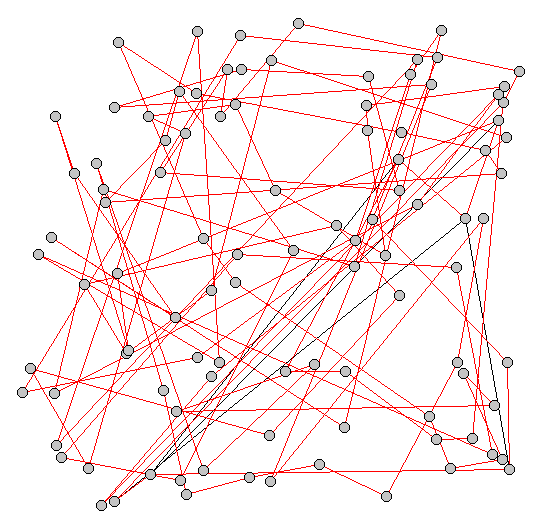

computation time  0:00:04.964009
best score: 18808.154716834633
best route: [82, 42, 83, 10, 9, 14, 48, 37, 20, 68, 95, 75, 86, 67, 28, 15, 39, 54, 79, 21, 17, 27, 43, 35, 57, 74, 78, 63, 88, 6, 45, 13, 26, 16, 38, 8, 46, 24, 29, 98, 91, 99, 66, 77, 22, 50, 44, 69, 87, 33, 25, 93, 60, 53, 61, 51, 47, 62, 23, 3, 90, 65, 55, 72, 5, 92, 89, 40, 80, 32, 84, 56, 31, 85, 71, 94, 81, 30, 19, 18, 36, 34, 96, 58, 12, 64, 59, 7, 70, 2, 76, 52, 11, 4, 49, 97, 41, 1, 0, 73]


In [36]:
move_operator = swapped_cities
#move_operator = reversed_sections
max_evaluations = 500
#do_hc_evaluations(max_evaluations,move_operator) 
do_hc_evaluations(max_evaluations,move_operator, plot_slowdown=10e-3)

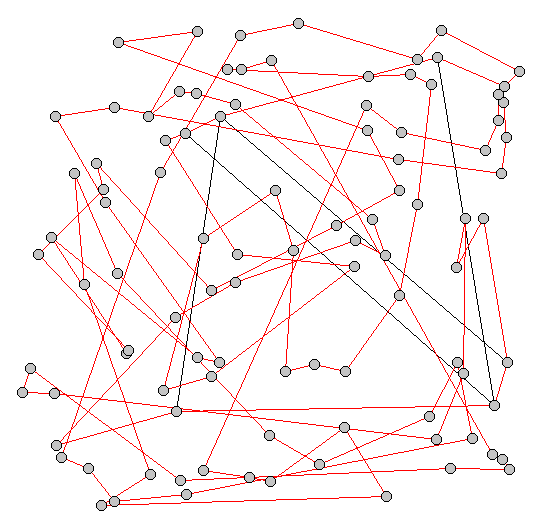

computation time  0:00:03.354561
best score: 10416.576905473541
best route: [86, 56, 70, 98, 12, 93, 2, 40, 25, 99, 39, 19, 8, 85, 4, 80, 97, 78, 26, 16, 54, 41, 11, 62, 43, 14, 22, 67, 96, 30, 9, 34, 31, 79, 88, 36, 61, 64, 6, 37, 72, 95, 58, 45, 13, 52, 77, 69, 60, 81, 66, 68, 92, 10, 18, 21, 82, 87, 46, 91, 27, 44, 5, 0, 35, 23, 84, 65, 15, 94, 55, 76, 32, 90, 1, 63, 83, 28, 20, 50, 38, 49, 74, 59, 57, 7, 42, 75, 53, 71, 47, 3, 51, 48, 17, 29, 89, 24, 33, 73]


In [37]:
move_operator = swapped_cities
#move_operator = reversed_sections
max_evaluations = 5000
#do_hc_evaluations(max_evaluations,move_operator)
do_hc_evaluations(max_evaluations,move_operator, plot_slowdown=50e-5)

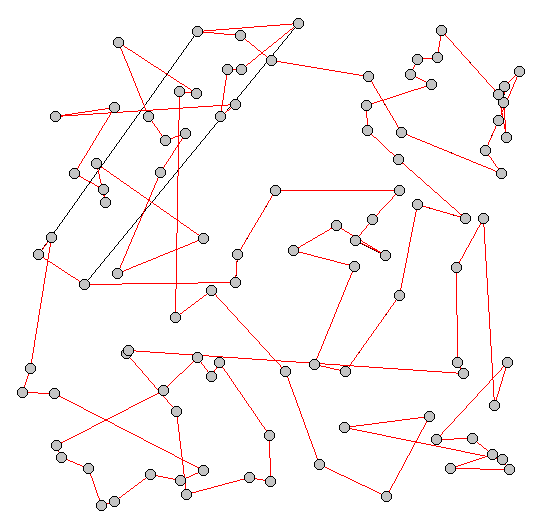

computation time  0:00:03.579918
best score: 6154.958086131059
best route: [5, 68, 0, 35, 39, 50, 31, 79, 20, 82, 60, 69, 44, 99, 9, 30, 56, 86, 73, 34, 21, 10, 8, 43, 49, 62, 64, 11, 13, 6, 45, 58, 55, 76, 72, 37, 95, 94, 32, 15, 71, 53, 52, 47, 48, 51, 65, 84, 54, 3, 90, 97, 36, 61, 18, 22, 88, 67, 38, 96, 23, 1, 63, 41, 16, 78, 26, 19, 14, 59, 57, 28, 4, 83, 74, 85, 80, 12, 75, 2, 93, 91, 40, 70, 27, 17, 24, 89, 29, 81, 46, 33, 87, 7, 42, 25, 98, 77, 66, 92]


In [38]:
#move_operator = swapped_cities
move_operator = reversed_sections
max_evaluations = 5000
do_hc_evaluations(max_evaluations,move_operator, plot_slowdown=50e-5)

## Bonus: Helper Methods & Declarations

The following cells help deciding if an algorithm A is better than another algorithm B.

In [39]:
import time
def get_reps(alg, n_reps, *args, **kwargs):
    times = []
    scores = []
    for i in range(n_reps):
        np.random.seed(i)
        then = time.time()
        num_evaluations, best_score, best = alg(*args, **kwargs)
        now = time.time()
        time_cost = now - then
        times.append(time_cost)
        scores.append(best_score)
    return times, scores

In [40]:
def a12(lst1,lst2,rev=True):
    "how often is x in lst1 more than y in lst2?"
    more = same = 0.0
    for x in lst1:
        for y in lst2:
            if   x==y : same += 1
            elif rev     and x > y : more += 1
            elif not rev and x < y : more += 1
    return (more + 0.5*same)  / (len(lst1)*len(lst2))

In [41]:
# decrease these values for quicker results
max_evaluations = 2000
n_reps = 30

In [42]:
hc_swapping_times, hc_swapping_scores = get_reps(hc, n_reps, init_function, swapped_cities, objective_function, max_evaluations)

In [43]:
hc_reversing_times, hc_reversing_scores = get_reps(hc, n_reps, init_function, reversed_sections, objective_function, max_evaluations)

In [44]:
import scipy.stats as sps
from matplotlib import pyplot as plt
def short_stats(a,b):
    plt.hist(a, color="k", label="first")
    plt.hist(b, color="r", label="second")
    plt.legend()
    _, p = sps.mannwhitneyu(a, b)
    if p > 0.05:
        print("No significant difference (p= {} > 0.05)".format(p))
    else:
        print("Found significant difference with p={} (lower ist better)".format(p))
        chance = a12(a, b, rev=False)
        print("First is better with chance {}".format(chance))

Found significant difference with p=3.019859359162157e-11 (lower ist better)
First is better with chance 0.0


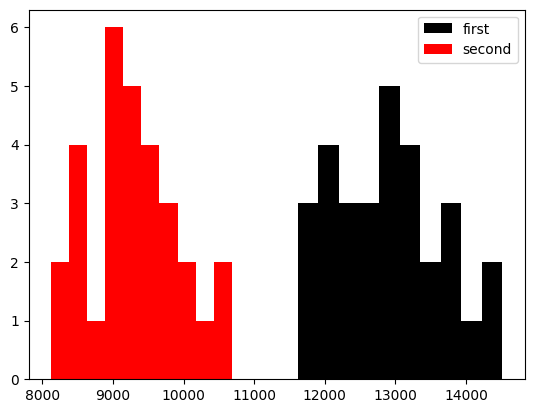

In [45]:
short_stats(hc_swapping_scores, hc_reversing_scores)

## Next: your turn on the exercise sheet

# Exemplary Solutions

## Dummy Baseline: Random Sampling

In [46]:
def random_dummy(init_function, max_evaluations):
    S = init_function()
    S_score = objective_function(S)
    evals = 1
    while evals < max_evaluations:
        neighbours_S = init_function()
        R = init_function()
        R_score = objective_function(R)
        evals += 1
        if(R_score < S_score):
            S = R
            S_score = R_score
    return (evals, S_score, S)

In [47]:
random_times, random_scores = get_reps(random_dummy, n_reps, init_function, max_evaluations)

Found significant difference with p=3.019859359162157e-11 (lower ist better)
First is better with chance 1.0


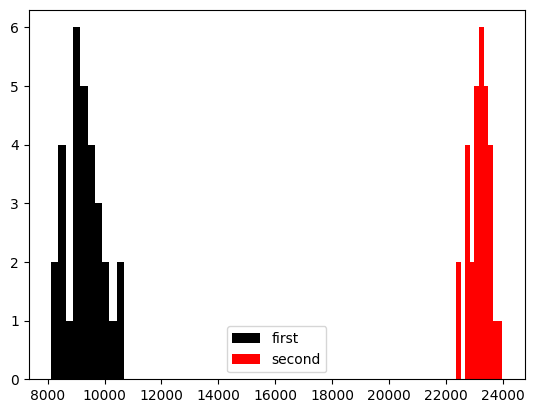

In [48]:
short_stats(hc_reversing_scores, random_scores)

## Steepes Ascent HC

In [49]:
def hc_sa(init_function, move_operator, objective_function, max_evaluations, tweaks, limit=100):
    S = init_function()
    S_score = objective_function(S)
    evals = 1
    tries = 0
    while evals < max_evaluations:
        neighbours_S = move_operator(S)
        R = next(neighbours_S)
        R_score = objective_function(R)
        evals += 1
        for _ in range(tweaks-1):
            W = next(neighbours_S)
            W_score = objective_function(W)
            evals += 1
            if W_score < R_score:
                R = W
                R_score = W_score
        if(R_score < S_score):
            S = R
            S_score = R_score
            tries = 0
        else:
            tries += 1
        if tries >= limit:
            break # couldn't find better move - must be local opt
    return (evals, S_score, S)

In [50]:
num_tweaks = 5
sa_hc_times, sa_hc_scores = get_reps(hc_sa, n_reps, init_function, move_operator, objective_function, max_evaluations, num_tweaks)

Found significant difference with p=1.3111030420756061e-08 (lower ist better)
First is better with chance 0.07222222222222222


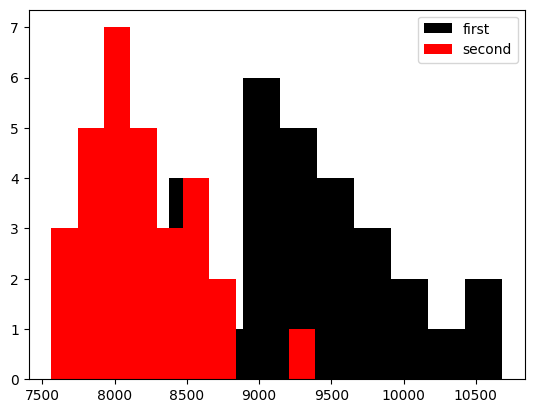

In [51]:
short_stats(hc_reversing_scores, sa_hc_scores)

## SA HC with replacement

In [52]:
def hc_sa_wr(init_function, move_operator, objective_function, max_evaluations, tweaks, limit=100):
    S = init_function()
    S_score = objective_function(S)
    Best = S # new
    Best_score = S_score # new
    evals = 1
    tries = 0
    while evals < max_evaluations:
        neighbours_S = move_operator(S)
        R = next(neighbours_S)
        R_score = objective_function(R)
        evals += 1
        for _ in range(tweaks-1):
            W = next(neighbours_S)
            W_score = objective_function(W)
            evals += 1
            if W_score < R_score:
                R = W
                R_score = W_score
        S = R # new
        S_score = R_score # new
        if(S_score < Best_score): # new
            Best = S # new
            Best_score = S_score # new
            tries = 0 # new
        else:
            tries += 1 # new
        if tries >= limit:
            break # couldn't find better move - must be local max
    return (evals, Best_score, Best)

In [53]:
sa_hc_wr_times, sa_hc_wr_scores = get_reps(hc_sa, n_reps, init_function, move_operator, objective_function, max_evaluations, num_tweaks)

No significant difference (p= 0.20620548705301323 > 0.05)


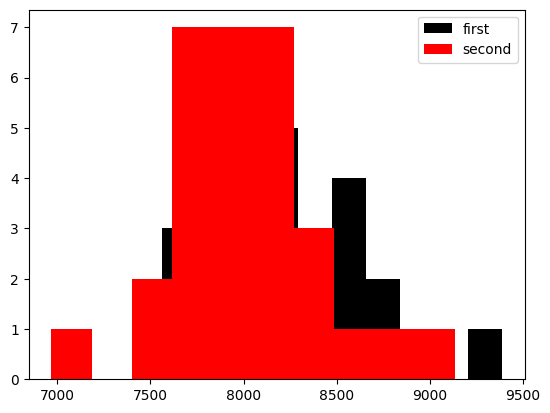

In [54]:
short_stats(sa_hc_scores, sa_hc_wr_scores)

## Simulated Annealing

In [55]:
def cooling_function(start_t, alpha):
    T = start_t
    while True:
        yield T
        T *= alpha

In [56]:
import math
def switch_prob(temp, R_score, S_score):
    if R_score < S_score:
        return 1.0
    elif temp == 0:
        return 0.0
    else:
        return math.exp(-abs(R_score - S_score) / temp)

In [57]:
def simulated_annealing(
    init_function, move_operator, objective_function, max_eval, start_temp, alpha
):
    temperature_gen = cooling_function(start_temp, alpha) # new
    t = next(temperature_gen) # new
    S = init_function()
    S_score = objective_function(S)
    Best = S
    Best_score = S_score
    evals = 1
    temperature_jumps = 0
    while evals < max_evaluations:
        neighbours_S = move_operator(S)
        R = next(neighbours_S)
        R_score = objective_function(R)
        evals += 1
        do_temperature_switch = random.random() < switch_prob(t, R_score, S_score) # new
        ## for debugging (counts how many jumps are made because of temp)
        if do_temperature_switch and R_score > S_score: # new
            temperature_jumps += 1 # new
        ## end debugging

        if R_score < S_score or do_temperature_switch: # new
            S = R
            S_score = R_score
        t = next(temperature_gen) # new
        if S_score < Best_score:
            Best = S
            Best_score = S_score
        if t <= 1e-30:
            print("Reached convergence")
            break
    print(
        "{} temperature switches out of {} total evals".format(temperature_jumps, evals)
    )
    return (evals, Best_score, Best)

In [58]:
temp = objective_function(init_function()) # set temp to initial fitness
alpha = 0.98
sim_an_times, sim_an_scores = get_reps(simulated_annealing, n_reps, init_function, move_operator, objective_function, max_evaluations,
                                          temp, alpha,)

132 temperature switches out of 2000 total evals
139 temperature switches out of 2000 total evals
124 temperature switches out of 2000 total evals
123 temperature switches out of 2000 total evals
126 temperature switches out of 2000 total evals
132 temperature switches out of 2000 total evals
129 temperature switches out of 2000 total evals
133 temperature switches out of 2000 total evals
139 temperature switches out of 2000 total evals
137 temperature switches out of 2000 total evals
133 temperature switches out of 2000 total evals
123 temperature switches out of 2000 total evals
125 temperature switches out of 2000 total evals
132 temperature switches out of 2000 total evals
122 temperature switches out of 2000 total evals
127 temperature switches out of 2000 total evals
111 temperature switches out of 2000 total evals
122 temperature switches out of 2000 total evals
127 temperature switches out of 2000 total evals
134 temperature switches out of 2000 total evals
137 temperature swit

No significant difference (p= 0.7844597689495465 > 0.05)


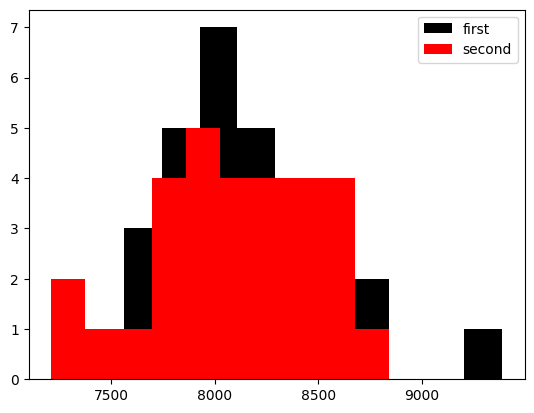

In [59]:
short_stats(sa_hc_scores, sim_an_scores)

## Tabu Search

In [60]:
from collections import deque
def tabu_search(init_function, move_operator, objective_function, max_evaluations,num_tweaks,
                tabu_len):
    l = tabu_len
    n = num_tweaks
    S = init_function()
    S_score = objective_function(S)
    Best = S
    Best_score = S_score
    
    L = deque([], l)
    evals = 1
    
    while evals < max_evaluations:
        neighbours_S = move_operator(S)
        R = next(neighbours_S)
        evals += 1
        R_score = objective_function(R)
        for _ in range(n-1):
            W = next(neighbours_S)
            evals += 1
            W_score = objective_function(W)
            if W not in L and (W_score < R_score or R in L):
                R = W
                R_score = W_score
        if R not in L and R_score < S_score:
            S = R
            S_score = R_score
            L.appendleft(R) # add new element to list
        if S_score < Best_score:
            Best = S
            Best_score = S_score
        
    return (evals, Best_score, Best)

In [61]:
num_tweaks = 5
tabu_length = 100
tabu_times, tabu_scores = get_reps(tabu_search, n_reps, init_function, move_operator, objective_function, max_evaluations,
                                          num_tweaks, tabu_length,)

No significant difference (p= 0.641423522520332 > 0.05)


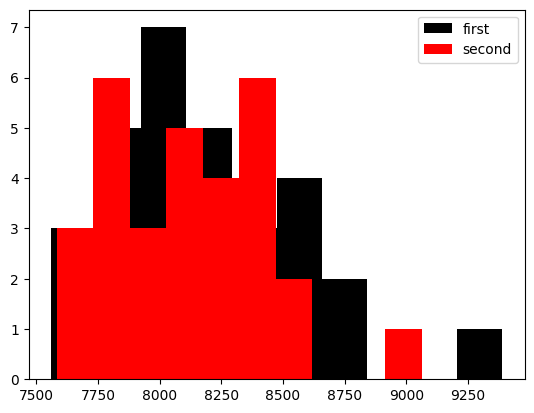

In [62]:
short_stats(sa_hc_scores, tabu_scores)

# Bonus Plots
combining all scores

In [63]:
import pandas as pd
import itertools as it
tabu_tups = [(approach, score, time) for approach, score, time in zip(it.repeat("Tabu"), tabu_scores, tabu_times)]
sa_hc_tups = [(approach, score, time) for approach, score, time in zip(it.repeat("Steepest Ascent HC w/ replacement"), sa_hc_wr_scores, sa_hc_wr_times)]
sa_hc_wr_tups = [(approach, score, time) for approach, score, time in zip(it.repeat("Steepest Ascent HC"), sa_hc_scores, sa_hc_times)]
hc_tups = [(approach, score, time) for approach, score, time in zip(it.repeat("HC"), hc_reversing_scores, hc_reversing_times)]
sa_tups = [(approach, score, time) for approach, score, time in zip(it.repeat("Simulated Annealing"), sim_an_scores, sim_an_times)]
#dummy_tups = [(approach, score, time) for approach, score, time in zip(it.repeat("Dummy Random"), random_scores, random_times)]
dummy_tups= []
all_tups = [*dummy_tups, *tabu_tups, *sa_hc_tups, *sa_hc_wr_tups, *hc_tups, *sa_tups]
df = pd.DataFrame(all_tups, columns=["approach", "score", "time"])

ModuleNotFoundError: No module named 'pandas'

In [ ]:
import seaborn as sns
sns.set_context("notebook")
sns.relplot(data=df, x="time", y="score", hue="approach", style="approach", alpha=0.75, s=50, height=7)